In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
len(df)

8807

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Checking For Null Values 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#max missing data
df.isnull().sum().max()

2634

In [8]:
#row with max missing data
df.count().idxmin()

'director'

In [9]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [10]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [13]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [14]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [15]:
# No. of movies and no. of TV Shows on netflix
df["type"].value_counts()[:]

Movie      6126
TV Show    2664
Name: type, dtype: int64

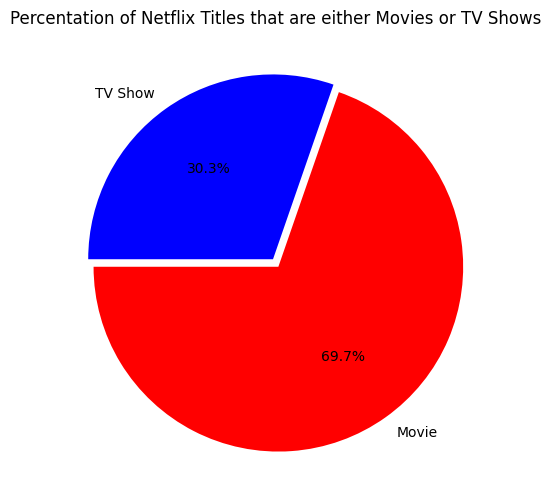

In [16]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

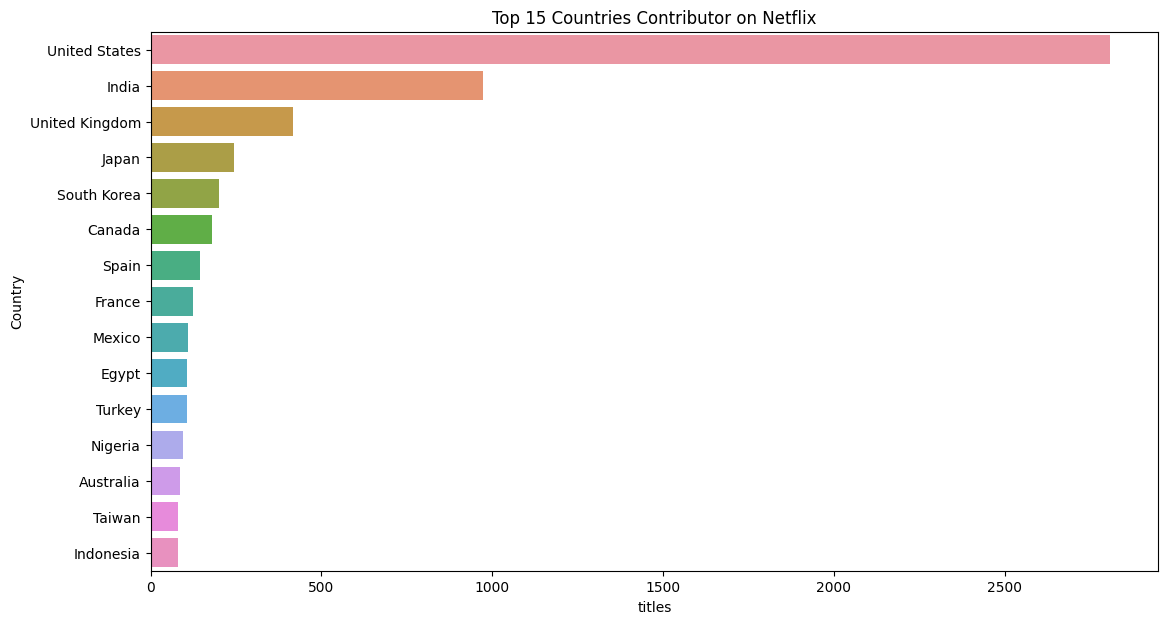

In [17]:
# Top 10 countries on netflix
filtered_countries = df.set_index('title').country.str.split( '  ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('titles')
plt.ylabel('Country')
plt.show()

In [42]:
df["director"].value_counts()[1:6] 

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Name: director, dtype: int64

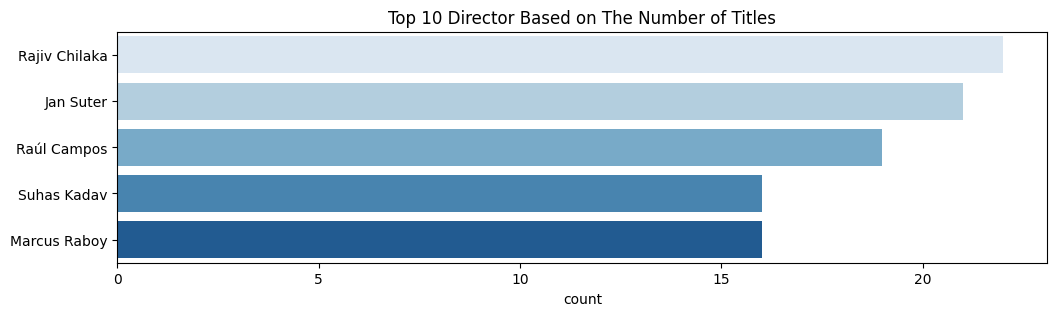

In [19]:
# Top 5 directors
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,3))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:5], palette='Blues')
plt.show()

In [33]:
filtered_genres = df.set_index('title').genre.str.split('  ', expand=True).stack().reset_index(level=1, drop=True);
df["genre"].value_counts()[:10] 

Dramas                      1599
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       773
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     385
Stand-Up Comedy              334
Horror Movies                275
Name: genre, dtype: int64

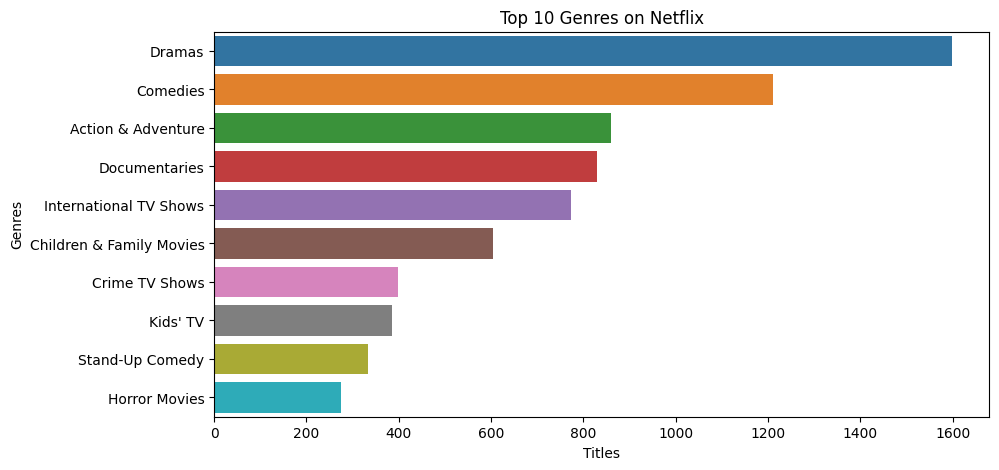

In [36]:
# Top 10 Genres
filtered_genres = df.set_index('title').genre.str.split('  ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,5))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [43]:
filtered_cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split('  ', expand=True).stack().reset_index(level=1, drop=True)
df["cast"].value_counts()[1:6] 

David Attenborough                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil    14
Samuel West                                                                                10
Jeff Dunham                                                                                 7
David Spade, London Hughes, Fortune Feimster                                                6
Name: cast, dtype: int64

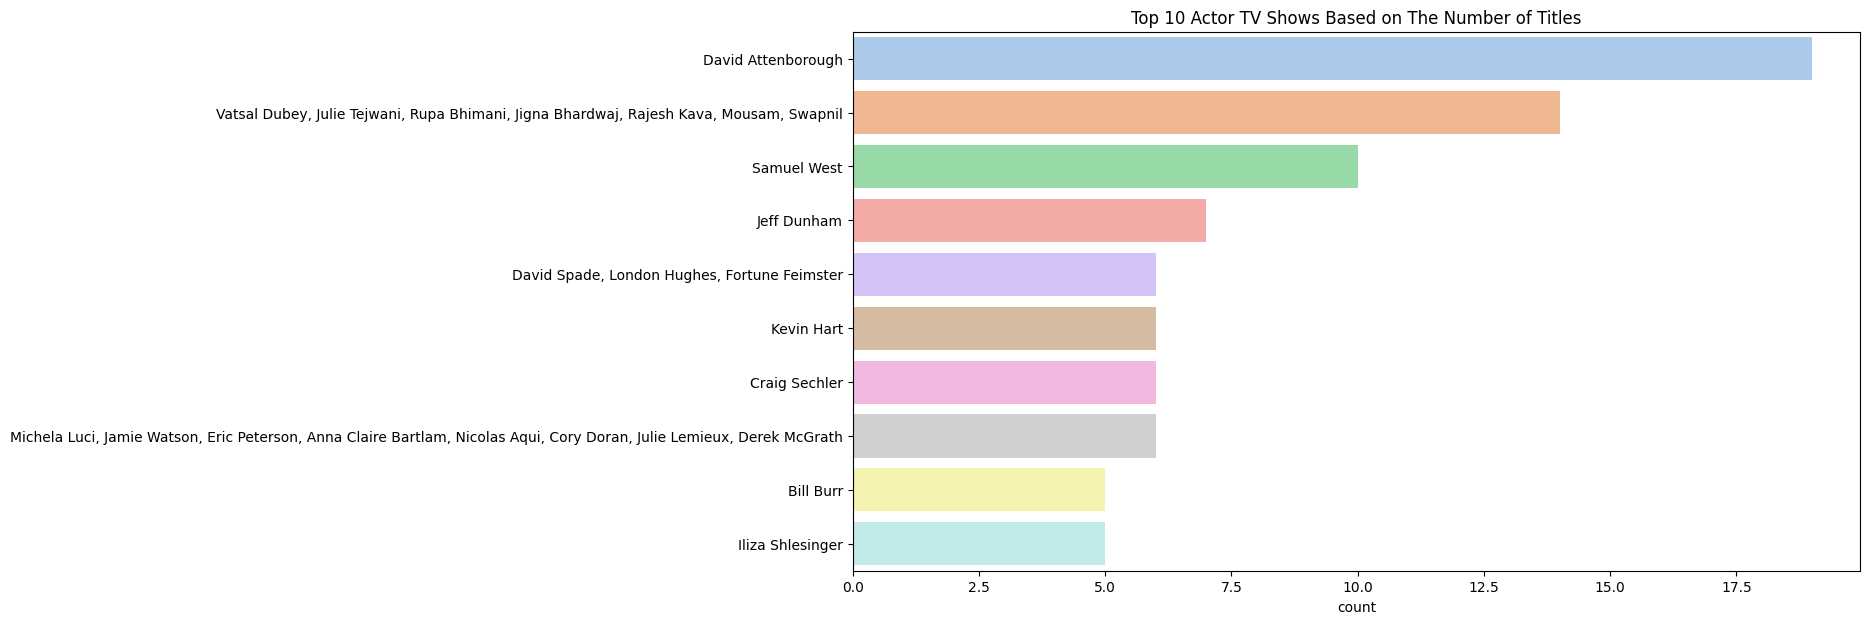

In [22]:
filtered_cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split('  ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

# MOVIES

In [23]:
movies = df.query("type == 'Movie'")

In [44]:
movies.drop(["type"], axis = 1).head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [45]:
#movies released in 2021
movies['release_year'].apply(lambda a: a in range(2021,2022)).sum()

277

In [46]:
#directors with maximum no. of movies
movies["director"].value_counts()[1:6] 

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: director, dtype: int64

In [47]:
#Top 10 Countries with most movies
movies["country"].value_counts()[:5]

United States          2055
India                   893
Country Unavailable     439
United Kingdom          206
Canada                  122
Name: country, dtype: int64

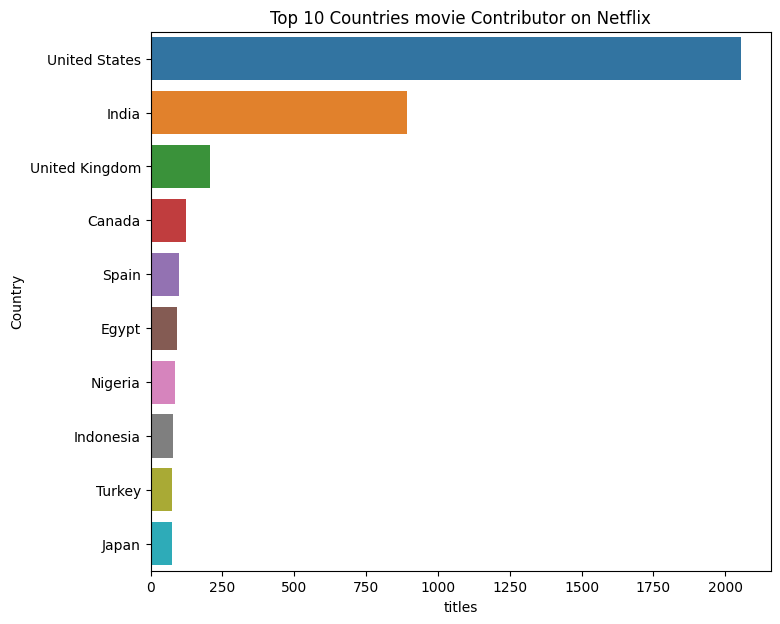

In [67]:
# Top 10 countries on netflix
filtered_countries_movies = movies.set_index('title').country.str.split( '  ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries_movies = filtered_countries_movies[filtered_countries_movies != 'Country Unavailable']
plt.figure(figsize=(8,7))
g = sns.countplot(y = filtered_countries_movies, order=filtered_countries_movies.value_counts().index[:10])
plt.title('Top 10 Countries movie Contributor on Netflix')
plt.xlabel('titles')
plt.ylabel('Country')
plt.show()

# Indian Movies

In [28]:
Indian = movies.query("country == 'India'")

In [48]:
Indian.drop(["country"], axis = 1).head(2)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genre,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","September 21, 2021",1998,TV-14,166 min,Comedies,When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...","September 5, 2021",2017,TV-14,128 min,Action & Adventure,After growing up amidst the gang wars of his h...


In [30]:
#Total Indian movies on netflix
len(Indian)

893

In [49]:
# Directors with maximum no. of Indian movies
Indian["director"].value_counts()[1:6] 

David Dhawan          9
Ram Gopal Varma       7
Imtiaz Ali            6
Anees Bazmee          6
Sooraj R. Barjatya    6
Name: director, dtype: int64

In [50]:
#movies released in 2021
Indian['release_year'].apply(lambda a: a in range(2021,2022)).sum()

22

# TV Shows


In [55]:
shows = df.query("type == 'TV Show'")

In [56]:
shows.drop(["type"], axis = 1).head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,genre,description
1,s2,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [57]:
#shows released in 2021
shows['release_year'].apply(lambda a: a in range(2021,2022)).sum()

315

In [58]:
#directors with maximum no. of shows
shows["director"].value_counts()[1:6] 

Alastair Fothergill    3
Hsu Fu-chun            2
Iginio Straffi         2
Shin Won-ho            2
Rob Seidenglanz        2
Name: director, dtype: int64

In [69]:
#Top 10 Countries with most shows
shows["country"].value_counts()[:6]

United States          754
Country Unavailable    390
United Kingdom         212
Japan                  167
South Korea            158
India                   79
Name: country, dtype: int64

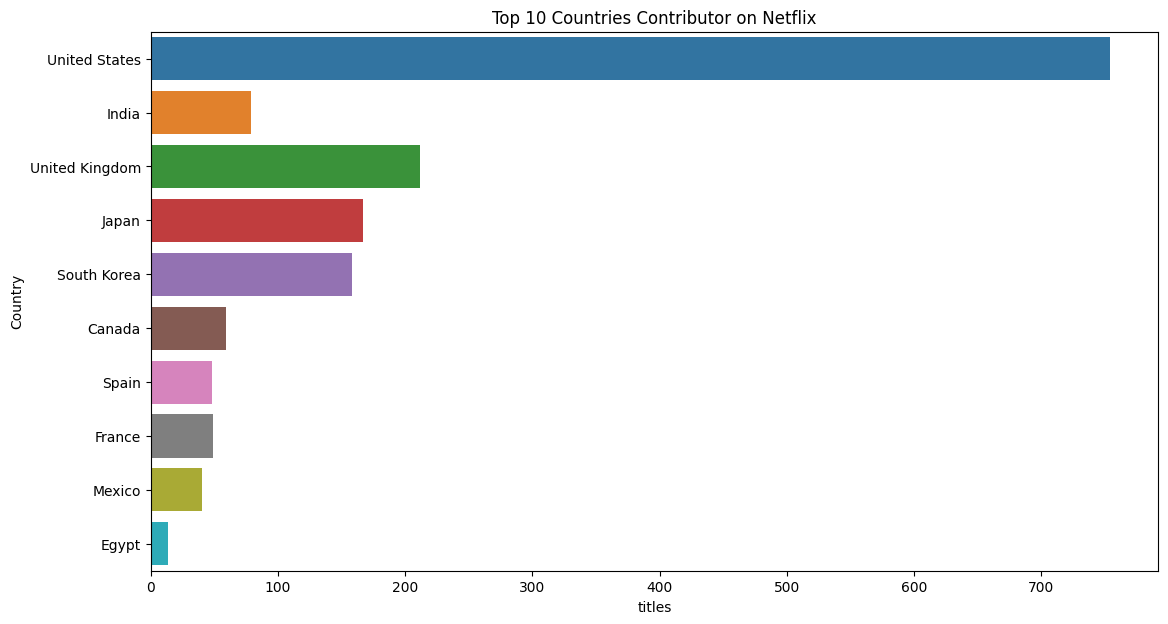

In [68]:
# Top 10 countries on netflix
filtered_countries_shows = shows.set_index('title').country.str.split( '  ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries_shows = filtered_countries_shows[filtered_countries_shows != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries_shows, order=filtered_countries.value_counts().index[:10])
plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('titles')
plt.ylabel('Country')
plt.show()

# Indian Shows

In [61]:
Indian_shows = shows.query("country == 'India'")

In [62]:
Indian_shows.drop(["country"], axis = 1).head(2)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genre,description
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
39,s40,TV Show,Chhota Bheem,No Director,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...","September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."


In [63]:
#Total Indian shows on netflix
len(Indian_shows)

79

In [64]:
# Directors with maximum no. of Indian shows
Indian_shows["director"].value_counts()[1:6] 

Bejoy Nambiar, Priyadarshan, Karthik Narain, Vasanth Sai, Karthik Subbaraj, Arvind Swamy, Rathindran R Prasad, Sarjun, Gautham Vasudev Menon    1
Vijay Roche                                                                                                                                     1
Tharun Bhascker Dhaassyam, B. V. Nandini Reddy, Nag Ashwin, Sankalp Reddy                                                                       1
Sudha Kongara, Vignesh Shivan, Gautham Vasudev Menon, Vetri Maaran                                                                              1
Soumendra Padhi                                                                                                                                 1
Name: director, dtype: int64

In [65]:
# Indian Shows released in 2021
Indian_shows['release_year'].apply(lambda a: a in range(2021,2022)).sum()

9